## Testing the Euler method

We used the Euler method to solve $\dot{x} = \alpha x$.

We needed to discretize this equations...

$$ x(t+\Delta t) = x(t) (1 + \alpha \Delta t). $$

We then discretized time...

$$ t \rightarrow t_n = t_0 + n \Delta t $$
$$ x_{n+1} = x_n (1 + \alpha \Delta t). $$




In [ ]:
# define our test euler method
def euler_test(alpha, dt, x_0, t_0, n_steps):
  """
  This function calculates the solution to x' = alpha * x with Euler's method.
  """
  x = [x_0] # initialized x list
  t = [t_0] # initialized t list
  for _ in range(n_steps):
    x_new = x[-1] * ( 1 + alpha * dt ) # update x
    t_new = t[-1] + dt # update t
    x.append(x_new) # append x
    t.append(t_new) # append t
  return t, x

In [ ]:
# import needed modules
import matplotlib.pyplot as plt
import math

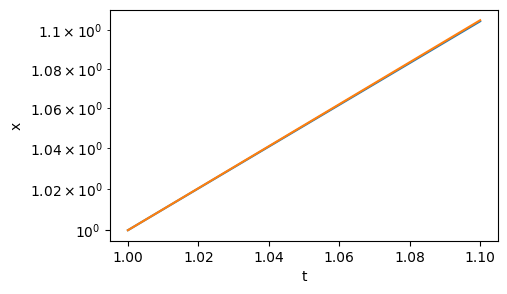

In [ ]:
# assign variables and call function
alpha   = 1
dt      = 0.01
x_0     = 1
t_0     = 1
n_steps = 10
t, x = euler_test(alpha, dt, x_0, t_0, n_steps)

# get the exact values
x_exact = [x_0 * math.exp(alpha * (t[i] - t_0)) for i in range(len(t))] # using list comprehension
x_error = [x[i] - x_exact[i] for i in range(len(x))] # using list comprehension

# plot with matplotlib
plt.figure(figsize=(5,3))
plt.semilogy(t, x)
plt.semilogy(t, x_exact)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

## Testing the Euler method on a simple harmonic oscillator

We used the Euler method to solve $\ddot{x} = -\omega_0^2 x$.

We needed to discretize this equations...

$$ x(t+\Delta t) = x(t)  + v(t) \Delta t $$
$$ v(t+\Delta t) = v(t)  - \omega_0^2 x(t) \Delta t. $$


We then discretized time...

$$ t \rightarrow t_n = t_0 + n \Delta t $$
$$ x_{n+1} = x_n + v_n \Delta t $$
$$ v_{n+1} = v_n - \omega_0^2 x_n \Delta t. $$




In [ ]:
# define our test euler method for a simple harmonic oscillator
def euler_sho(omega_0, x_0, v_0, t_0, t_f, n_steps):
  """
  This function calculates the solution to x'' = - omega_0 ^2 x with Euler's method.
  """
  dt = (t_f - t_0) / n_steps # calculate dt
  x = [x_0] # initialized x list
  v = [v_0] # initialized v list
  t = [t_0] # initialized t list
  for _ in range(n_steps):
    x_new = x[-1] + v[-1] * dt # update x
    v_new = v[-1] - omega_0 ** 2 * x_new * dt # update v : using an implicit form
    t_new = t[-1] + dt # update t
    x.append(x_new) # append x
    v.append(v_new) # append v
    t.append(t_new) # append t
  return t, x, v

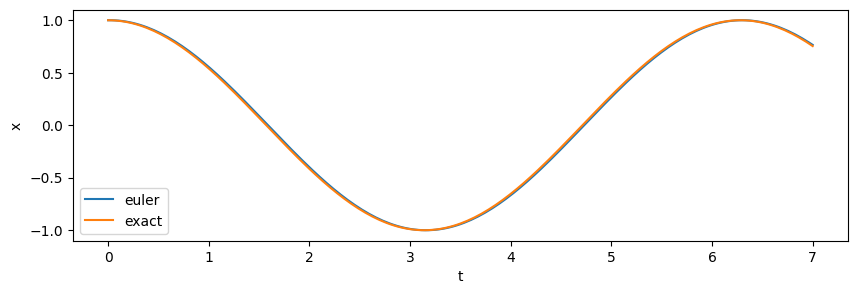

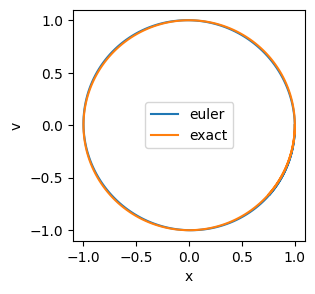

In [ ]:
# assign variables and call function
omega_0 = 1
x_0     = 1
v_0     = 0
t_0     = 0
t_f     = 7
n_steps = 200

t, x, v = euler_sho(omega_0, x_0, v_0, t_0, t_f, n_steps)

# get the exact values
x_exact_sho = [x_0 * math.cos(omega_0 * (t[i] - t_0)) + (v_0 / omega_0) * math.sin(omega_0 * (t[i] - t_0)) for i in range(len(t))] # using list comprehension
v_exact_sho = [- x_0 * omega_0 * math.sin(omega_0 * (t[i] - t_0)) + v_0 * math.cos(omega_0 * (t[i] - t_0)) for i in range(len(t))] # using list comprehension

# plot with matplotlib
plt.figure(figsize=(10,3))
plt.plot(t, x, label='euler')
plt.plot(t, x_exact_sho,label='exact')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()

# plot a phase portrait wiht matplotlib
plt.figure(figsize=(3,3))
plt.plot(x, v, label='euler')
plt.plot(x_exact_sho, v_exact_sho,label='exact')
plt.xlabel('x')
plt.ylabel('v')
plt.legend()
plt.show()

## Pseudocode for solving initial value problems/temporal evolution of systems

For our custom Euler code:
1. **Import modules:** import `math` for simple functions and constants; import `matplotlib.pyplot` for plotting.  
2. **Define the differential equation as a first-order system:** made a custom function from $\ddot{\theta} + \omega_0^2 sin(\theta)=0$ to give $\dot{\theta} = \Omega$ and $\dot{\Omega} = - \omega_0^2 sin(\theta)$.
3. **Assign variables and time span:** define `omega_0`, the initial conditions (`theta_0`: initial angle; and `ang_vel_0`: initial angular velocity), and the time span.
4. **Solve differntial equation numerically:** call our custom euler solver.
5. **Plot results and test output:** plot the temporal evolution of `theta` (`theta` vs. `t`), and the phase portrait (`ang_vel` vs. `theta). Define and compare with an analytic solution to the harmonic oscillator/small-angle approximation.



In [2]:
# import modules
import matplotlib.pyplot as plt
import math

In [7]:
# define system of equations
def euler_rigid_pendulum(omega_0, theta_0, ang_vel_0, t_0, t_f, n_steps):
  """
  This function calculates the solution to theta'' = - omega_0 ^2 sin(theta) with Euler's method.
  """
  dt = (t_f - t_0) / n_steps # calculate dt
  theta = [theta_0] # initialized theta list
  ang_vel = [ang_vel_0] # initialized angular velocity list
  t = [t_0] # initialized t list
  for _ in range(n_steps):
    theta_new = theta[-1] + ang_vel[-1] * dt # update theta
    # ang_vel_new = ang_vel[-1] - omega_0 ** 2 * math.sin(theta[-1]) * dt # update angular velocity : using an explicit form
    ang_vel_new = ang_vel[-1] - omega_0 ** 2 * math.sin(theta_new) * dt # update angular velocity : using an simple implicit (symplectic) form
    t_new = t[-1] + dt # update t
    theta.append(theta_new) # append theta
    ang_vel.append(ang_vel_new) # append ang_vel
    t.append(t_new) # append t
  return t, theta, ang_vel

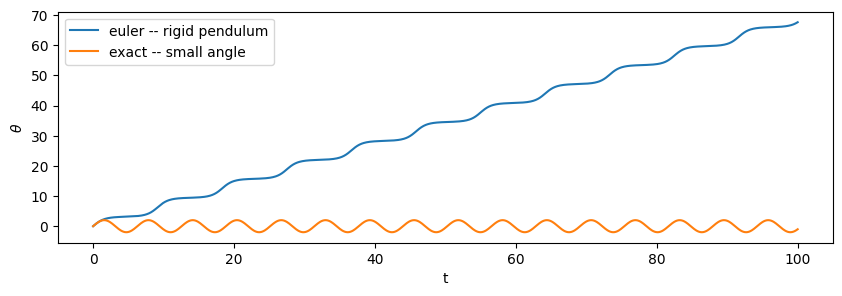

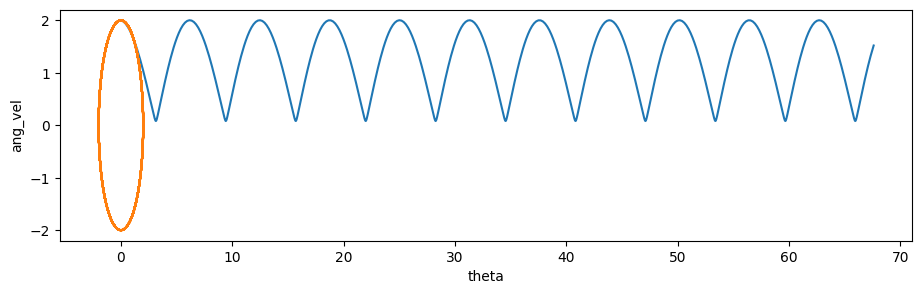

In [26]:
# assign variables
omega_0   = 1
theta_0   = 0
ang_vel_0 = 2
t_0       = 0
t_f       = 100
n_steps   = 1000

# call euler solver
t, theta, ang_vel = euler_rigid_pendulum(omega_0, theta_0, ang_vel_0, t_0, t_f, n_steps)

# get the exact values
theta_exact_sho = [theta_0 * math.cos(omega_0 * (t[i] - t_0)) + (ang_vel_0 / omega_0) * math.sin(omega_0 * (t[i] - t_0)) for i in range(len(t))] # using list comprehension
ang_vel_exact_sho = [- theta_0 * omega_0 * math.sin(omega_0 * (t[i] - t_0)) + ang_vel_0 * math.cos(omega_0 * (t[i] - t_0)) for i in range(len(t))] # using list comprehension

# plot with matplotlib
plt.figure(figsize=(10,3))
plt.plot(t, theta, label='euler -- rigid pendulum')
plt.plot(t, theta_exact_sho,label='exact -- small angle')
plt.xlabel('t')
plt.ylabel('$\\theta$')
plt.legend()
plt.show()

# plot a phase portrait wiht matplotlib
plt.figure(figsize=(11,3))
plt.plot(theta, ang_vel, label='euler -- rigid pendulum')
plt.plot(theta_exact_sho, ang_vel_exact_sho,label='exact -- small angle')
plt.xlabel('theta')
plt.ylabel('ang_vel')
# plt.legend()
plt.show()